In [66]:
import pandas as pd
import numpy as np
import spotipy
import os
import sys
import time
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline
%precision 3

'%.3f'

In [56]:
sp = spotipy.Spotify(
'BQAHu-EDfao11NpYnHMYHNsymwlF1_Vl6lQZOjKxYDdEGrZSgorhiWDg8T5H3QmBhz2XgKX9UU5QqbVG2rn9SO4Ys5ptW-5f9FfO5Wh22ZWpAEnQMhVFOOkHZxbjxKsrx_LxrUNuhTE-RWW6rvW7qI5VrDZKDV4pcZUrGPQnqaBEFIXhBsa08DluzFlJ'

)

In [4]:
tracks = pd.read_csv('tracks.csv')

In [22]:
tracks['popularity'] = np.NaN
tracks['acousticness'] = np.NaN
tracks['danceability'] = np.NaN
tracks['energy'] = np.NaN
tracks['instrumentalness'] = np.NaN
tracks['liveness'] = np.NaN
tracks['loudness'] = np.NaN
tracks['mode'] = np.NaN
tracks['speechiness'] = np.NaN
tracks['tempo'] = np.NaN
tracks['valence'] = np.NaN

In [23]:
features = ['acousticness','danceability','energy','instrumentalness',
           'liveness','loudness','mode','speechiness','tempo','valence']

In [61]:
track_ids = tracks.loc[tracks.popularity.isna()].id.tolist()
total = len(tracks.loc[tracks.popularity.isna()].id.tolist())
i = 0
now = time.time()
for track_id in track_ids:
    i += 1
    if i % 300 == 0:
        print('Progress %4.2f' % (i / total * 100))
        print('Takes {} seconds'.format(time.time() - now))
    ad_features = sp.audio_features(tracks=[track_id])[0]
    popularity = sp.track(track_id)['popularity']
    tracks.loc[tracks.id == track_id,'popularity'] = popularity
    if ad_features == None:
        continue
    for each in features:
        tracks.loc[tracks.id == track_id,each] = ad_features[each]


Progress 71.43
Takes 73.8170440196991 seconds


In [62]:
print('There are {} tracks without popularity data'\
      .format(len(tracks.loc[tracks.popularity.isna()].id.tolist())))
print('There are {} tracks without audio feature data'\
      .format(len(tracks.loc[tracks.loudness.isna()].id.tolist())))

There are 0 tracks without popularity data
There are 75 tracks without audio feature data


Text(0,0.5,'Frequency')

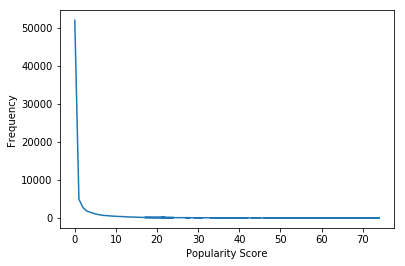

In [71]:
ax = tracks.popularity.value_counts().plot(kind = 'line')
ax.set_xlabel('Popularity Score')
ax.set_ylabel('Frequency')

In [63]:
tracks.to_csv('tracks_with_audio_features.csv',index = False)

In [72]:
tracks.shape

(69846, 21)